## Lab 4

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)(https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UTA-DataScience/DATA1401.2020.Fall/blob/master/Labs/Lab-4/Lab-4.ipynb)

In this lab we will become familiar with distributions, histograms, and functional programming. 


### Uniform Distribution

Lets start with generating some fake random data. You can get a random number between 0 and 1 using the python random module as follows:

In [3]:
import numpy as np
import random

r=random.random()
x = random.randint(1,100)
d = (r*x)

print("The Value of r is", r)
print("The Value of x is", x)
print("The Value of d is", d)

The Value of r is 0.13432025813496284
The Value of x is 5
The Value of d is 0.6716012906748142


Everytime you call random, you will get a new number.

*Exercise 1:* Using random, write a function `generate_uniform(N, mymin, mymax)`, that returns a python list containing N random numbers between specified minimum and maximum value. Note that you may want to quickly work out on paper how to turn numbers between 0 and 1 to between other values. 

In [4]:
# Solution:
def uniform_generator(seed=x):
      a=1111111
      b=2222222
      k=6700417
      x=seed
      def random():
          nonlocal x
          x=((a*x+b)%(k*seed+round(r)))
          return round(x/(k))
      return random
my_uniform=uniform_generator()
random_numbers=list()

def generate_uniform(N,mymin,my_max):
  for _ in range(N):
      random_numbers.append(my_uniform())
  out = random_numbers
  return out


In [5]:
# Test:
x = random.randint(1,100)

data = generate_uniform(100,-10,10)
print ("Data Type:", type(data))
print ("Data Length:", len(data))
if len(data)>0: 
    print ("Type of Data Contents:", type(data[0]))
    print ("Data Minimum:", np.min(data))
    print ("Data Maximum:", np.max(data))
print(data)

Data Type: <class 'list'>
Data Length: 100
Type of Data Contents: <class 'int'>
Data Minimum: 0
Data Maximum: 5
[1, 2, 2, 2, 5, 2, 1, 3, 4, 2, 3, 1, 1, 2, 4, 4, 1, 1, 5, 1, 5, 5, 3, 1, 1, 3, 4, 4, 5, 3, 5, 3, 2, 4, 0, 0, 3, 2, 1, 3, 2, 0, 3, 4, 1, 3, 5, 0, 0, 1, 2, 4, 1, 3, 3, 4, 3, 3, 4, 0, 1, 5, 1, 2, 0, 3, 1, 2, 4, 3, 5, 4, 2, 4, 2, 3, 0, 2, 3, 0, 1, 0, 3, 5, 5, 0, 2, 2, 1, 2, 5, 2, 1, 2, 1, 1, 5, 4, 4, 1]


*Exercise 2a:* 
Write a function that computes the mean of values in a list.

In [6]:
# Solution:
N=len(data)

# Version 1:
def mean(data):
  s=sum(data)
  out = s/N
  return out

# Version 2:
def mean_2(data):
  out = (1/N)*sum(data)
  return out

In [7]:
# Test your solution here
print("Version 1: Mean of Data:", mean(data))
print("Version 1: Mean of Data [ROUNDED]:", round(mean(data)))
print("Version 2: Mean of Data:", mean_2(data))
print("Version 2: Mean of Data [ROUNDED]:", round(mean_2(data)))

Version 1: Mean of Data: 2.44
Version 1: Mean of Data [ROUNDED]: 2
Version 2: Mean of Data: 2.44
Version 2: Mean of Data [ROUNDED]: 2


*Exercise 2b:* 
Write a function that computes the variance of values in a list.

In [8]:
# Solution:
N=len(data)
v = (sum(data)-mean_2(data))

# Version 1:
def variance(data):
  m = mean(data)
  v = ((sum(data))-m)**2
  out = (1/(N-1))*v
  return out

# Version 2:
def variance_2(data):
  out = (1/(N-1))*(v**2)
  return out

In [9]:
# Test your solution here
print("Variance of Data:", variance(data))
print("Version 2: Mean of Data [ROUNDED]:", round(variance(data)))
print("Variance of Data:", variance_2(data))
print("Version 2: Mean of Data [ROUNDED]:", round(variance_2(data)))

Variance of Data: 589.4064000000001
Version 2: Mean of Data [ROUNDED]: 589
Variance of Data: 589.4064000000001
Version 2: Mean of Data [ROUNDED]: 589


## Histogramming

*Exercise 3:* Write a function that bins the data so that you can create a histogram. An example of how to implement histogramming is the following logic:

* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Determine the bin size (`bin_size`) by dividing the range of the function by the number of bins.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `x_min+i*bin_size` and `x_min+(i+1)*bin_size`, increment `hist[i].` 
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    

In [10]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [11]:
x_min = (np.min(data))
x_max = (np.max(data)) 
def arange(x_min,x_max,steps=10):
    step_size=(x_max-x_min)/steps
    x=x_min
    out = list()
    for i in range(x_min,x_max):
        out.append(x)
        x+=step_size
    return out

In [12]:
def histogram(data, n_bins=N,x_min=None, x_max=None):
    if x_min==None:
        x_min = (np.min(data))
    if x_max==None:
        x_max = (np.max(data))
        
    bin_edges = arange(x_min,x_max,n_bins)
    bin_edges.append(x_max)

    hist=list(np.random.normal(0,0,n_bins))
    
    for x in data:
        for i,(low_edge,high_edge) in enumerate(zip(bin_edges[:-1],bin_edges[1:])):
            if x>=low_edge and x<high_edge:
                hist[i]+=1
                break
                
    return hist,bin_edges

In [13]:
histogram(data, n_bins=N,x_min=None, x_max=None)
h,b=histogram(data,N)
print(h)

[11.0, 0.0, 0.0, 0.0, 76.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [14]:
# Test your solution here
np.histogram(data,range=(x_min,x_max),bins=50)

(array([11,  0,  0,  0,  0,  0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0,  0,
         0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0, 13]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]))

(array([11.,  0., 22.,  0., 20.,  0., 19.,  0., 15., 13.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

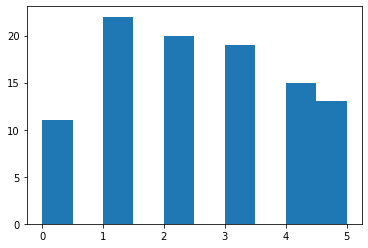

In [15]:
plt.hist(data)

*Exercise 4:* Write a function that uses the histogram function in the previous exercise to create a text-based "graph". For example the output could look like the following:
```
[  0,  1] : ######
[  1,  2] : #####
[  2,  3] : ######
[  3,  4] : ####
[  4,  5] : ####
[  5,  6] : ######
[  6,  7] : #####
[  7,  8] : ######
[  8,  9] : ####
[  9, 10] : #####
```

Where each line corresponds to a bin and the number of `#`'s are proportional to the value of the data in the bin. 

In [16]:
# Solution
character="#"
x = ([data])
def draw_histogram(x,n_bins,x_min=None,x_max=None,character="#",max_character_per_line=20):
  character="#"
  height = character
  n_bins = 3
  a = ([5],[18],[3])
  x_min = [3]
  x_max = [18]
  def generate_uniform(n_bins,x_min,a,x_max):
    a = ([5],[18],[3])
    my_uniform=uniform_generator()
    character=list()
    for _ in range(20):
      a = ([5],[18],[3])
      a.append("#")
  _=plt.hist(draw_histogram(a,n_bins = 3,x_min=3,x_max=18,character="#",max_character_per_line=20))

In [20]:
def generate_func(func,x_min,x_max,N):
  out=list()
  ### BEGIN SOLUTION
  func_data=list(data)
  total=list()

  for _ in range(N):
    v=(random.random()*(x_max-x_min)+x_min)
    func_data.append(func(v))

  y_min = (np.min(func_data)) 
  y_max = (np.max(func_data))  

  while len(out) < N:
    x=(random.random()+(x_max-x_min)+x_min)
    y=(random.random()+(y_max-y_min))
    total.append(x)
    if y <= func(x):
      out.append(x)

### END SOLUTION

  return out, total, y_min,y_max

In [21]:
def gaussian(mean,sd):
  def f(x):
    return math.exp(-((x-mean)**2))/math.sqrt(math.pi*sd)
  return f

g1=gaussian(0,1)
g2=gaussian(10,3)

print(g1)

<function gaussian.<locals>.f at 0x7f0c8a0e5d08>


In [22]:
out=generate_func(g1,x_min,x_max,N)
draw_histogram(out,10)
print(mean(out))
print(variance(out)**(1/2))

KeyboardInterrupt: ignored

## Functional Programming

*Exercise 5:* Write a function the applies a booling function (that returns true/false) to every element in data, and return a list of indices of elements where the result was true. Use this function to find the indices of entries greater than 0.5. 

In [23]:
import math

In [24]:
n_bins = 10
x_min = (np.min(data))
x_max = (np.max(data)) 
h = x_min
b = x_max

  ### BEGIN SOLUTION

def histogram(x,n_bins=10,x_min=False,x_max=True):
  def hist():
    x=list(data)
    for _ in range(N):
      random_numbers.append(my_uniform())
      _ = plt.hist(random_numbers,bins=n_bins,range=(0,0))
      print(False)
  def bin_edges():
    for i in range(N):
      random_numbers.append(my_uniform())
      plt.hist(random_numbers,bins=n_bins,range=(h,b))
      print(True)
  return hist(),bin_edges()


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


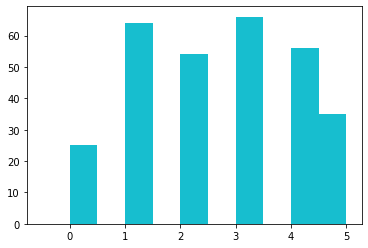

In [25]:
# Test your solution here
h,b=histogram(data,n_bins=10,x_min=False,x_max=True)

*Exercise 6:* The inrange(mymin,mymax) function below returns a function that tests if it's input is between the specified values. Write corresponding functions that test:
* Even
* Odd
* Greater than
* Less than
* Equal
* Divisible by

In [26]:
def in_range(mymin,mymax):
    def testrange(x):
        return x<mymax and x>=mymin
    return testrange

# Examples:
F1=in_range(0,10)
F2=in_range(11,50)

# Test of in_range
a = (F1(0), F1(1), F1(10), F1(15), F1(20))
b = (F2(0), F2(1), F2(10), F2(15), F2(19))

In [27]:
def odds(in_range):
  out_list=list()
  for num in range(0,10):
    if num%2==1:
      out_list.append(num)
  return out_list

def evens(in_range):
  out_list2=list()
  for num in range(0,5):
    if num%2==1:
      out_list2.append(num)
  return out_list2

def greater_than(in_range):
  out_great=list()
  for num in range(0,50):
    if num>1:
      out_great.append(num)
  return out_great
  
def less_than(in_range):
  out=list()
  for num in range(0,50):
    if num<15:
      out.append(num)
  return out

def equal(in_range):
  out=list()
  for num in range(45,50):
    if num==15:
      out.append(num)
  return out

def div_by(in_range):
  out=list()
  for num in range(0,50):
    if num%15:
      out.append(num)
  return out

In [28]:
# Test your solution
print("Number of Entries passing F1:", odds(F1))
print ("Number of Entries passing F1:", evens(F2))
print ("Number of Entries passing F1:", greater_than(b))
print ("Number of Entries passing F1:", less_than(a))
print ("Number of Entries passing F1:", equal(b))
print ("Number of Entries passing F1:", div_by(a))

Number of Entries passing F1: [1, 3, 5, 7, 9]
Number of Entries passing F1: [1, 3]
Number of Entries passing F1: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Number of Entries passing F1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Number of Entries passing F1: []
Number of Entries passing F1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49]


*Exercise 7:* Repeat the previous exercise using `lambda` and the built-in python functions sum and map instead of your solution above. 

## Monte Carlo

*Exercise 7:* Write a "generator" function called `generate_function(func,x_min,x_max,N)`, that instead of generating a flat distribution, generates a distribution with functional form coded in `func`. Note that `func` will always be > 0.  

Use the test function below and your histogramming functions above to demonstrate that your generator is working properly.

Hint: A simple, but slow, solution is to a draw random number test_x within the specified range and another number p between the min and max of the function (which you will have to determine). If p<=function(test_x), then place test_x on the output. If not, repeat the process, drawing two new numbers. Repeat until you have the specified number of generated numbers, N. For this problem, it's OK to determine the min and max by numerically sampling the function.  

In [80]:
import math
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [74]:
func=random.random()
func = data
x_min = (np.min(data))
x_max = (np.max(data)) 
def rand_gen():
  return random.randint(0,1)
  rand_gen()
def generate_function(N,x_min,x,x_max):
  def rand_gen():
    return random.randint(900,1000)
    x = rand_gen()
    return x
  out = list()
  end_results=1000       
  for i in range(N):
    result = rand_gen()
    end_results = end_results+result
    prob_value = end_results/(i+1)
    out.append(prob_value)
    plt.hist(out)
  return end_results/N    

951.706

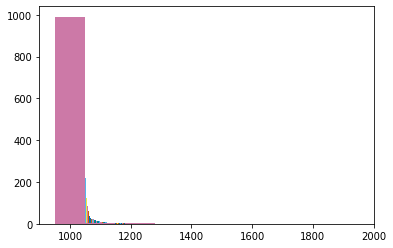

In [75]:
generate_function(N,x_min,x,x_max)

In [79]:
# A test function

def test_func(func,a=1,b=1):
  for _ in list(data):
    return abs(a*x-b)
    if p <= x(test_func):
      test_func = output
      return output
    else:
      return 'N/a'

test_func(data,a=1,b=1)

1

*Exercise 8:* Use your function to generate 1000 numbers that are normal distributed, using the `gaussian` function below. Confirm the mean and variance of the data is close to the mean and variance you specify when building the Gaussian. Histogram the data. 

In [82]:
def gaussian(mean,sigma=32144):
    random_numbers.append(my_uniform())
    my_uniform=uniform_generator(sigma)  
    def f():
        nonlocal my_uniform
        nonlocal mean
        u = my_uniform()
        return -mean*(math.log(1.-u))   
    return f
my_gaussian= gaussian(1000.)
my_gaussian()
random_numbers=list()
for _ in range(1000):
    random_numbers.append(my_gaussian())
_=plt.hist(random_numbers,bins=1000)
import math
random_numbers=list()
for _ in range(1000):
    random_numbers.append(my_uniform())
_=plt.hist(random_numbers,bins=1000,range=(1,10))

plt.hist(random_numbers,bins=1000,range=(1,10))

ValueError: ignored

*Exercise 9:* Combine your `generate_function`, `where`, and `in_range` functions above to create an integrate function. Use your integrate function to show that approximately 68% of Normal distribution is within one variance.

In [65]:
#@title Imports
!pip install -q symbulate
from symbulate import *

     |████████████████████████████████| 51kB 1.9MB/s 


In [56]:
list1 = []
#def integrate(func, x_min, x_max, n_points=1000):
def random_chance():
  return random.randint(1,50)
random_chance()

34

Final value: 25.75


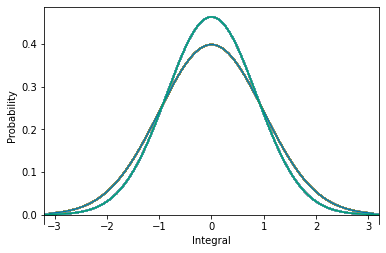

In [66]:
n_points = 1000
n = n_points
x = random.randint(0,50)
x_min = (1,50)
x_max = (50,100)
def main_func(n):
  results = 100
  for i in range(n):
    chance_result = random_chance()
    results = results + chance_result
    prob_value = results
    list1.append(prob_value)
    Normal().plot()
    Normal().cdf(1)
    Normal().mean()
    Normal().var()
    Normal(sd=0.86).plot(xlim=(-3.2, 3.2))
    plt.xlabel("Integral")
    plt.ylabel("Probability")
  return results/n
answer = main_func(100)
print("Final value:",answer)

    #return integral